# AirBnB Barcelona: An analysis of listings

<i>Analysis done on October 2019 of data provided in July 2019.</i>

On this project we'll look into the data provided by AirBnB - Barcelona on Kaggle (http://insideairbnb.com/get-the-data.html) to understand lodging in the area. The focus of the exploration will be:

1) What makes a listing more profitable?
2) What are the key features that generate better reviews?
3) Does the number of features relate with occupancy?

In order to explore this data we'll follow this simple steps:

- Data gathering and wrangling
- Data exploration
- Analysis and Visualization


## Data Gathering and wrangling

In [68]:
# Load libraries we'll use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score

%matplotlib inline

### Data loading
On this step we'll upload the data to be processed. There are few files available on Kaggle for AirBnB Barcelona (up to July 2019) so let's explore them and decide which ones will help us answer our pre-defined questions.

In [69]:
# load the data. There's more data available, but we'll use these 3 sets initially.
df_cal = pd.read_csv('./data/calendar.csv.gz', compression='gzip')
df_lis = pd.read_csv('./data/listings.csv')
df_lis2 = pd.read_csv('./data/listings.csv.gz', compression='gzip')
df_rev = pd.read_csv('./data/reviews.csv')
df_rev2 = pd.read_csv('./data/reviews.csv.gz', compression='gzip')
df_nei = pd.read_csv('./data/neighbourhoods.csv')
df_geo = pd.read_json('./data/neighbourhoods.geojson')

/Users/nomopix/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Calendar file
This file contains information detailed calendar data for listings in Barcelona. This file will show the price of the listing and wether it was available or not on that date.

In [70]:
df_cal.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,31380,2019-07-10,f,$75.00,$75.00,3,1125
1,18666,2019-07-10,f,$130.00,$130.00,3,730
2,18666,2019-07-11,f,$130.00,$130.00,3,730


### Listings files
There are 2 files available for listings. One with the summary information of listings and another with the summary information. For the purpose of this project, we'll use the one with the summary information.

In [71]:
df_lis.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,31,182
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,15,2019-07-02,0.20,31,129
2,21605,Nice and sunny duble room,82522,Meritxell,Sant Martí,el Poblenou,41.40560,2.19821,Private room,33,2,119,2019-07-04,3.08,2,15


In [72]:
df_lis2.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,20190710134514,2019-07-10,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",none,Apartment in Barcelona near to the Plaza de la...,...,f,f,flexible,f,f,31,31,0,0,0.02
1,18674,https://www.airbnb.com/rooms/18674,20190710134514,2019-07-10,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,Apartment in Barcelona located in the heart of...,...,t,f,strict_14_with_grace_period,f,f,31,31,0,0,0.20
2,21605,https://www.airbnb.com/rooms/21605,20190710134514,2019-07-10,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",none,Poblenou as one of the few areas that has grow...,...,f,f,moderate,f,f,2,0,2,0,3.08


### Review files
There are also 2 files for reviews. One contains the summary as in just the date and review ID (capturing the fact that there was a review) and another with the comment of the review as well as the name of the reviewer.
The summary information of the amount of reviews is contained in the listing file we'll be using so, for now, we'll not be using this file.

In [73]:
df_rev.head(2)

,listing_id,date
0,18666,2015-10-10
1,18674,2013-05-27


In [74]:
df_rev2.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,18666,50158511,2015-10-10,1559265,Jody,Very nice flat. We had easy transportation to ...
1,18674,4808211,2013-05-27,4841196,Caron,"Great location. Clean, spacious flat. Would re..."


#### Geolocation files
There are also 2 files available that relate to geo location, defining districts and neighbourhoods within Barcelona city. This could help draw visually where the properties are. For the initial purpose of the analysis, we'll leave these 2 files to the side as well but may come back to them on the visualization part.

In [75]:
df_nei.head(2)

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval


In [76]:
df_geo.head(2)

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


### Data wrangling

Now that we have picked the files we want to work with (calendar and listings), let's see what their structure is and whether they require cleansing.

In [77]:
print("The calendar file contains", df_cal.shape[0], "rows and", df_cal.shape[1], "columns.")
print("The columns are:", list(df_cal.columns))

The calendar file contains 7239045 rows and 7 columns.
The columns are: ['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']


In [78]:
df_cal.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,31380,2019-07-10,f,$75.00,$75.00,3,1125
1,18666,2019-07-10,f,$130.00,$130.00,3,730


In [79]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7239045 entries, 0 to 7239044
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 386.6+ MB


Columns price and adjusted_price refer to money, however they are strings in the dataset. Let's convert them so we can use them as numerical values.

In [80]:
df_cal["price"] = df_cal["price"].replace('[\$,]', '', regex=True).astype(float)
df_cal["adjusted_price"] = df_cal["adjusted_price"].replace('[\$,]', '', regex=True).astype(float)

In [82]:
df_cal.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,31380,2019-07-10,f,75.0,75.0,3,1125
1,18666,2019-07-10,f,130.0,130.0,3,730
2,18666,2019-07-11,f,130.0,130.0,3,730
3,18666,2019-07-12,f,130.0,130.0,3,730
4,18666,2019-07-13,f,130.0,130.0,3,730


Let's explore whether there are missing values within this dataset.

In [83]:
df_cal.isnull().sum()

listing_id          0
date                0
available           0
price             175
adjusted_price    175
minimum_nights      0
maximum_nights      0
dtype: int64

Based on the above, there seems to be 175 missing prices for some listings. Let's see what those are:

In [84]:
df_cal[df_cal["price"].isnull() == True].listing_id.unique()

array([10410622, 17486763])

There seem to be 2 listings that have null prices for some periods of time. Let's see if they always have null prices or whether they have it for only a period of time

In [85]:
df_cal[df_cal["listing_id"].isin([10410622, 17486763])==True].groupby("listing_id").price.unique()

listing_id
10410622    [144.0, 134.0, 154.0, 211.0, 124.0, 72.0, 160....
17486763    [75.0, 50.0, 77.0, 81.0, 80.0, 85.0, 74.0, 55....
Name: price, dtype: object

Both seem to have other pricing values for other periods. Let's plot their pricing to spot the periods for which the pricing is missing

In [86]:
df_calsub = df_cal[df_cal["listing_id"].isin([10410622, 17486763])==True]
df_calsub = df_calsub[["listing_id","date", "price"]]
df_calsub = df_calsub.pivot(index='date', columns='listing_id', values='price')
df_calsub.head(5)

listing_id,10410622,17486763
date,,
2019-07-10,144.0,75.0
2019-07-11,134.0,75.0
2019-07-12,154.0,75.0
2019-07-13,154.0,75.0
2019-07-14,144.0,50.0


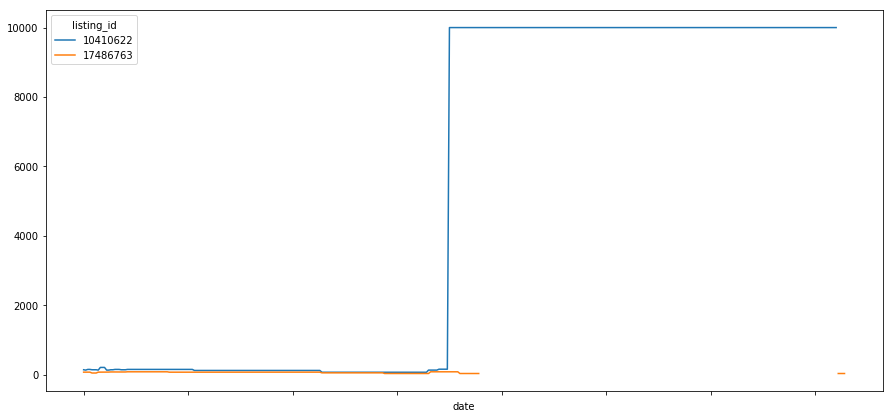

In [87]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_calsub.plot(ax=ax, kind='line');

This has shown that there are 2 peculiarities about these two listings. On one of them, it seems that the price for future listings is missing over a period, for the other one, there are some nulls but also a huge price increase. 

Let's address the first case, given that the past information is available, we'll fill the price information with the average of the past as it seems to be quite stable.

In [91]:
mean_p = df_cal[df_cal["listing_id"].isin([17486763])==True].price.mean()
mean_pa = df_cal[df_cal["listing_id"].isin([17486763])==True].adjusted_price.mean()
df_cal.loc[df_cal['price'].isnull() & df_cal["listing_id"].isin([17486763]), 'price'] = mean_p
df_cal.loc[df_cal['adjusted_price'].isnull()& df_cal["listing_id"].isin([17486763]), 'adjusted_price'] = mean_pa

Now let's look at the second case, before addressing its nulls. It seems that there's a really high price from a moment in time. Does this happen to other properties? Is a high price value used to represent something else? Let's see.

In [122]:
df_calsub2 = df_cal[["listing_id", "date","price"]]

df_calsub2.head(5)

,listing_id,date,price
0,31380,2019-07-10,75.0
1,18666,2019-07-10,130.0
2,18666,2019-07-11,130.0
3,18666,2019-07-12,130.0
4,18666,2019-07-13,130.0


In [123]:
print("There are", df_cal.listing_id.nunique(),"unique listings on the dataset")

There are 19833 unique listings on the dataset


So, which properties contain prices that are outliers? Let's find the standard deviation for each property and then filter those that contain values outside of this.

In [207]:
df_sum = df_calsub2.groupby(["listing_id"]).agg({'price':['min', 'median','max','std']})
df_sum.columns = ['_'.join(col).strip() for col in df_sum.columns.values]
df_sum = df_sum.reset_index()
df_sum.head(10)

,listing_id,price_min,price_median,price_max,price_std
0,18666,130.0,130.0,130.0,0.000000
1,18674,62.0,146.0,9999.0,4850.616893
2,21605,33.0,33.0,35.0,0.904003
3,23197,190.0,210.0,350.0,19.936789
4,25786,37.0,45.0,45.0,1.332962
5,31377,42.0,59.0,80.0,7.006989
6,31380,52.0,74.0,115.0,7.864828
7,31958,75.0,110.0,1000.0,273.161211
8,32471,85.0,137.0,1000.0,268.016787
9,32615,30.0,30.0,30.0,0.000000


There are quite a few interesting cases where there are periods where the price varies in respect to the standard deviation by more than 3 times the minimum price

In [210]:
df_weird = df_sum[df_sum['price_std']>df_sum["price_min"]*3]

Let's plot them in a map to see if there's something about their location that may related to this.

In [211]:
df_cal[df_cal["listing_id"].isin(df_weird.listing_id.unique())]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
760,18674,2019-07-10,f,146.0,146.0,7,1125
761,18674,2019-07-11,f,156.0,156.0,2,1125
762,18674,2019-07-12,f,156.0,156.0,2,1125
763,18674,2019-07-13,f,146.0,146.0,7,1125
764,18674,2019-07-14,f,146.0,146.0,7,1125
765,18674,2019-07-15,f,146.0,146.0,7,1125
766,18674,2019-07-16,f,146.0,146.0,7,1125
767,18674,2019-07-17,f,146.0,146.0,7,1125
768,18674,2019-07-18,f,156.0,156.0,7,1125
769,18674,2019-07-19,f,156.0,156.0,7,1125


## Data Exploration

## Analysis and Visualization